In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the data
train_data = pd.read_csv("mnist_train.csv")
test_data = pd.read_csv("mnist_test .csv")

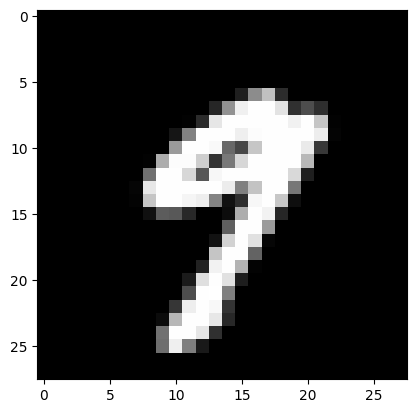

In [2]:
# Plot some of the digits
def plot_digit(data, index):
    digit = data.iloc[index, 1:].values.reshape(28, 28)
    plt.imshow(digit, cmap='gray')
    plt.show()

plot_digit(test_data, 20)

In [3]:
# Prepare the data
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

In [4]:
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert data to float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
# Reshape the data to match the input shape of the model
X_train = X_train.reshape(-1, 28, 28, 1)  # Add a channel dimension
X_test = X_test.reshape(-1, 28, 28, 1)    # Add a channel dimension

# Build the neural network model
model = Sequential([
    tf.keras.Input(shape=(28, 28, 1)),  # Input shape includes channel dimension
    Flatten(),
    Dense(15, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.7797 - loss: 1.2824 - val_accuracy: 0.9103 - val_loss: 0.6214
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 476us/step - accuracy: 0.8837 - loss: 0.6598 - val_accuracy: 0.9110 - val_loss: 0.5199
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 544us/step - accuracy: 0.8869 - loss: 0.5853 - val_accuracy: 0.9197 - val_loss: 0.4783
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 522us/step - accuracy: 0.8895 - loss: 0.5391 - val_accuracy: 0.9067 - val_loss: 0.4712
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 492us/step - accuracy: 0.8933 - loss: 0.5167 - val_accuracy: 0.9230 - val_loss: 0.4233
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.8941 - loss: 0.4989 - val_accuracy: 0.9200 - val_loss: 0.4178
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.8985 - loss: 0.4783 - val_accuracy: 0.9200 - val_loss: 0.4155
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.9014 -

In [9]:
# Predict on the test set
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step


In [10]:
# Correct Classification Rate
correct_classification_rate = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f'Correct Classification Rate: {correct_classification_rate}')

Correct Classification Rate: 0.9484


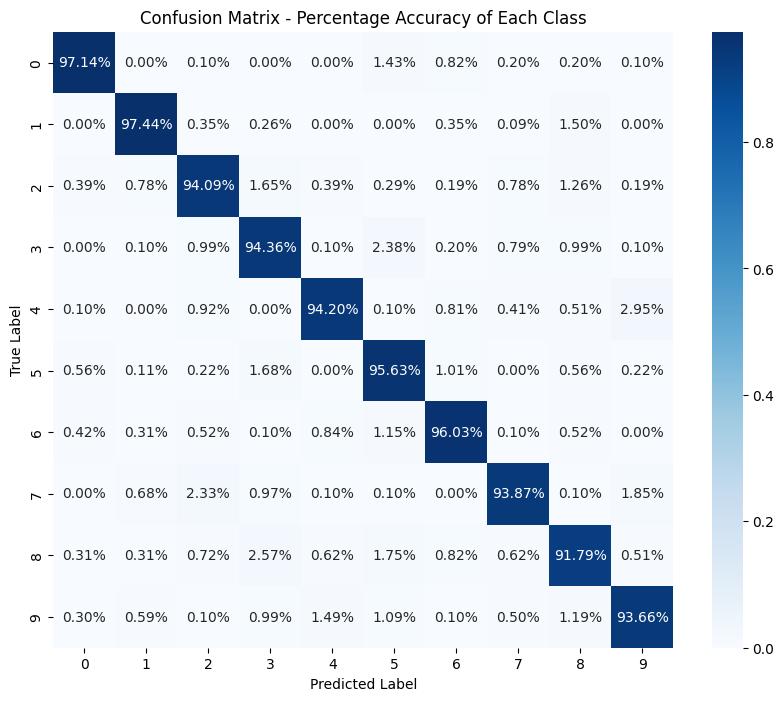

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Normalize the confusion matrix to show percentages
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2%", cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Percentage Accuracy of Each Class')
plt.show()


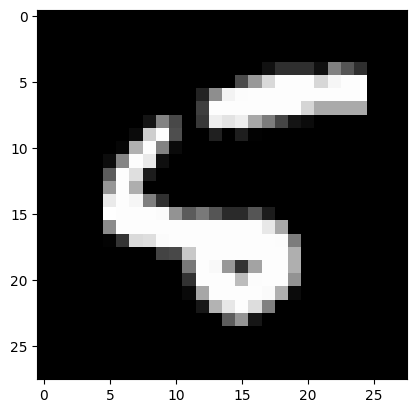

True label: 5, Predicted: 6


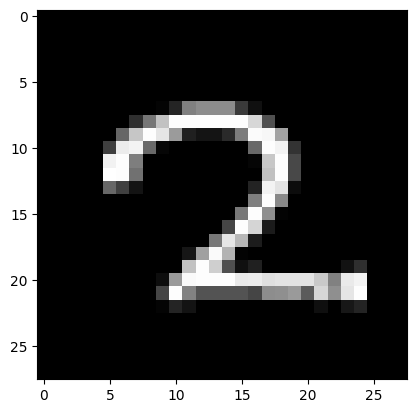

True label: 2, Predicted: 1


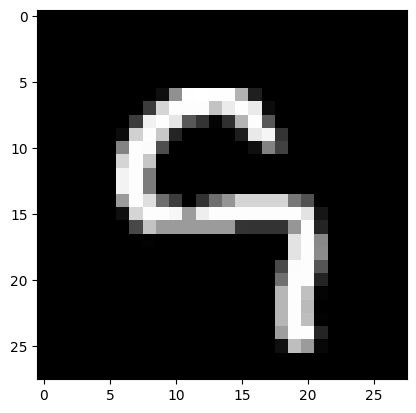

True label: 9, Predicted: 5


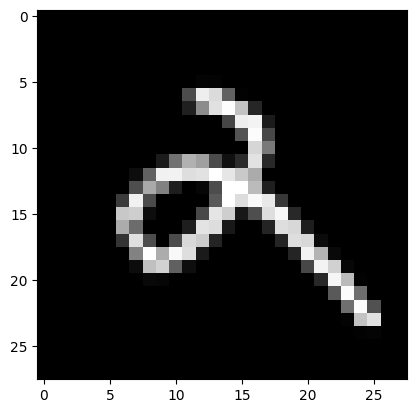

True label: 2, Predicted: 9


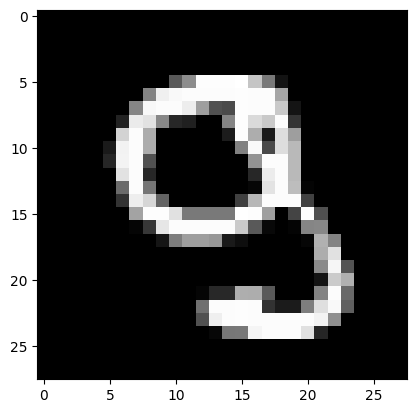

True label: 9, Predicted: 8


In [11]:
# See some of the digits that were misclassified
misclassified_indices = np.where(predicted_classes != true_classes)[0]
for index in misclassified_indices[:5]:  # Show first 5 misclassified digits
    plot_digit(test_data, index)
    print(f'True label: {true_classes[index]}, Predicted: {predicted_classes[index]}')